In [1]:
import sys
import os

# Add the src directory to the Python path

sys.path.append('/Users/qianhuilin/Desktop/Envision/UTOPIA_package/utopia_package/src')
from utopia.microservice.generate_object.generate_object_app import *
from utopia.utopia_json import *
from utopia.utopia import utopiaModel
from utopia.preprocessing.generate_rate_constants_json import *
from utopia.preprocessing.RC_generator_json import *
from utopia.results_processing_json.process_results_json import *
from utopia.preprocessing.fill_interactions_df_json import *
from utopia.results_processing.mass_balance_check_json import *
from utopia.solver_steady_state_json import *
import pymongo
import json
import copy

In [2]:
# Load the default configuration and data from the 'data' folder.
data_data = utopiaModel.load_json_file("data/default_data.json")
config_data = utopiaModel.load_json_file("data/default_config.json")

In [3]:
# initialization of config_data and input_data
initialize_mongo_collections()

In [4]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['utopia']
config_collection = db['configure_data']
input_collection = db['input_data']
config_document = config_collection.insert_one(config_data)
input_document = input_collection.insert_one(data_data)

In [5]:
# Clear the model_json collection
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['utopia']
model_json_collection = db["model_json"]
model_json_collection.delete_many({}) 

DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

In [6]:


model_id,model_json = create_model_json()
print("model_json")
print(model_json)


Model JSON created and inserted into MongoDB collection 'model_json'.
model_json
{'MPdensity_kg_m3': 980, 'MP_composition': 'PE', 'shape': 'sphere', 'MP_form': 'freeMP', 'big_bin_diameter_um': 5000, 'N_sizeBins': 5, 'FI': 0.5, 't_half_deg_free': 66000, 't_frag_gen_FreeSurfaceWater': 36.5, 'heter_deg_factor': 10, 'biof_deg_factor': 0.5, 'factor_deepWater_soilSurface': 10, 'factor_sediment': 100, 'biof_frag_factor': 2, 'heter_frag_factor': 100, 'vol_algal_cell_m3': 2e-16, 'spm_density_kg_m3': 1388, 'comp_input_file_name': 'inputs_compartments.csv', 'comp_interactFile_name': 'compartment_interactions.csv', 'boxName': 'Utopia', 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'], 'compartments_list': ['Ocean_Surface_Water', 'Ocean_Mixed_Water', 'Ocean_Column_Water', 'Coast_Surface_Water', 'Coast_Column_Water', 'Surface_Freshwater', 'Bulk_Freshwater', 'Sediment_Freshwater', 'Sediment_Ocean', 'Sediment_Coast', 'Beaches_Soil_Surface', 'Beaches_Deep_Soil', 'Background_Soil_Surface',

In [7]:

generate_coding_dictionaries_json()

In [8]:
print("model_json")
print(model_json)

model_json
{'MPdensity_kg_m3': 980, 'MP_composition': 'PE', 'shape': 'sphere', 'MP_form': 'freeMP', 'big_bin_diameter_um': 5000, 'N_sizeBins': 5, 'FI': 0.5, 't_half_deg_free': 66000, 't_frag_gen_FreeSurfaceWater': 36.5, 'heter_deg_factor': 10, 'biof_deg_factor': 0.5, 'factor_deepWater_soilSurface': 10, 'factor_sediment': 100, 'biof_frag_factor': 2, 'heter_frag_factor': 100, 'vol_algal_cell_m3': 2e-16, 'spm_density_kg_m3': 1388, 'comp_input_file_name': 'inputs_compartments.csv', 'comp_interactFile_name': 'compartment_interactions.csv', 'boxName': 'Utopia', 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'], 'compartments_list': ['Ocean_Surface_Water', 'Ocean_Mixed_Water', 'Ocean_Column_Water', 'Coast_Surface_Water', 'Coast_Column_Water', 'Surface_Freshwater', 'Bulk_Freshwater', 'Sediment_Freshwater', 'Sediment_Ocean', 'Sediment_Coast', 'Beaches_Soil_Surface', 'Beaches_Deep_Soil', 'Background_Soil_Surface', 'Background_Soil', 'Impacted_Soil_Surface', 'Impacted_Soil', 'Air'], 

In [9]:
model_json = model_json_collection.find_one()

model_id = model_json['_id']

In [10]:
model_json_updated = model_json_collection.find_one({'_id':model_id})

In [11]:
print(model_json_updated)

{'_id': ObjectId('68656e0ea4548d29a8e5f1cf'), 'MPdensity_kg_m3': 980, 'MP_composition': 'PE', 'shape': 'sphere', 'MP_form': 'freeMP', 'big_bin_diameter_um': 5000, 'N_sizeBins': 5, 'FI': 0.5, 't_half_deg_free': 66000, 't_frag_gen_FreeSurfaceWater': 36.5, 'heter_deg_factor': 10, 'biof_deg_factor': 0.5, 'factor_deepWater_soilSurface': 10, 'factor_sediment': 100, 'biof_frag_factor': 2, 'heter_frag_factor': 100, 'vol_algal_cell_m3': 2e-16, 'spm_density_kg_m3': 1388, 'comp_input_file_name': 'inputs_compartments.csv', 'comp_interactFile_name': 'compartment_interactions.csv', 'boxName': 'Utopia', 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'], 'compartments_list': ['Ocean_Surface_Water', 'Ocean_Mixed_Water', 'Ocean_Column_Water', 'Coast_Surface_Water', 'Coast_Column_Water', 'Surface_Freshwater', 'Bulk_Freshwater', 'Sediment_Freshwater', 'Sediment_Ocean', 'Sediment_Coast', 'Beaches_Soil_Surface', 'Beaches_Deep_Soil', 'Background_Soil_Surface', 'Background_Soil', 'Impacted_Soil_S

In [12]:
model_json_backup = copy.deepcopy(model_json_updated)

In [13]:
print(model_json_backup)

{'_id': ObjectId('68656e0ea4548d29a8e5f1cf'), 'MPdensity_kg_m3': 980, 'MP_composition': 'PE', 'shape': 'sphere', 'MP_form': 'freeMP', 'big_bin_diameter_um': 5000, 'N_sizeBins': 5, 'FI': 0.5, 't_half_deg_free': 66000, 't_frag_gen_FreeSurfaceWater': 36.5, 'heter_deg_factor': 10, 'biof_deg_factor': 0.5, 'factor_deepWater_soilSurface': 10, 'factor_sediment': 100, 'biof_frag_factor': 2, 'heter_frag_factor': 100, 'vol_algal_cell_m3': 2e-16, 'spm_density_kg_m3': 1388, 'comp_input_file_name': 'inputs_compartments.csv', 'comp_interactFile_name': 'compartment_interactions.csv', 'boxName': 'Utopia', 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'], 'compartments_list': ['Ocean_Surface_Water', 'Ocean_Mixed_Water', 'Ocean_Column_Water', 'Coast_Surface_Water', 'Coast_Column_Water', 'Surface_Freshwater', 'Bulk_Freshwater', 'Sediment_Freshwater', 'Sediment_Ocean', 'Sediment_Coast', 'Beaches_Soil_Surface', 'Beaches_Deep_Soil', 'Background_Soil_Surface', 'Background_Soil', 'Impacted_Soil_S

In [14]:
(R, PartMass_t0, input_flows_g_s, input_flows_num_s,model_json_updated_2) = run_json(model_json_backup)

Assigned Ocean_Surface_Water volume: 1630000000000000.0 m3
Assigned Ocean_Mixed_Water volume: 3.26e+16 m3
Assigned Ocean_Column_Water volume: 1.31e+18 m3
Assigned Coast_Surface_Water volume: 67100000000000.0 m3
Assigned Coast_Column_Water volume: 1340000000000000.0 m3
Assigned Surface_Freshwater volume: 9050000000000.0 m3
Assigned Bulk_Freshwater volume: 90500000000000.0 m3
Assigned Sediment_Freshwater volume: 905000000000.0 m3
Assigned Sediment_Ocean volume: 9790000000000.0 m3
Assigned Sediment_Coast volume: 2680000000000.0 m3
Assigned Beaches_Soil_Surface volume: 3440.0 m3
Assigned Beaches_Deep_Soil volume: 34400.0 m3
Assigned Background_Soil_Surface volume: 873000000000.0 m3
Assigned Background_Soil volume: 8730000000000.0 m3
Assigned Impacted_Soil_Surface volume: 607000000000.0 m3
Assigned Impacted_Soil volume: 6070000000000.0 m3
Assigned Air volume: 3.06E+18 m3
modleBoxes:  [{'Bname': 'Utopia', 'Bdepth_m': None, 'Blength_m': None, 'Bwidth_m': None, 'Bvolume_m3': None, 'Bconexions'

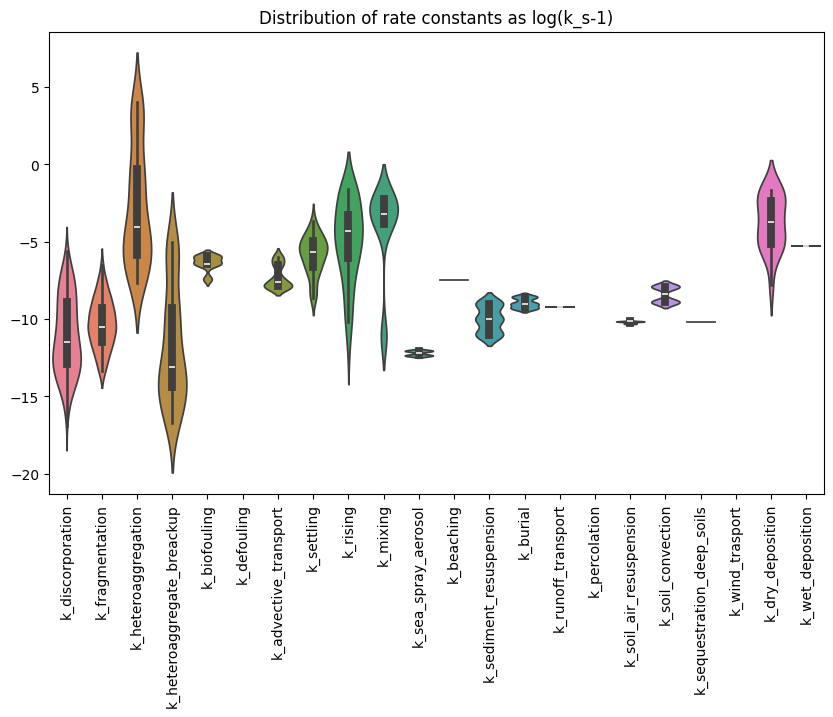

<Figure size 640x480 with 0 Axes>

In [15]:
RC_df = plot_rateConstants_json(model_json_updated_2)

In [16]:
print(model_json_updated_2)


{'_id': ObjectId('68656e0ea4548d29a8e5f1cf'), 'MPdensity_kg_m3': 980, 'MP_composition': 'PE', 'shape': 'sphere', 'MP_form': 'freeMP', 'big_bin_diameter_um': 5000, 'N_sizeBins': 5, 'FI': 0.5, 't_half_deg_free': 66000, 't_frag_gen_FreeSurfaceWater': 36.5, 'heter_deg_factor': 10, 'biof_deg_factor': 0.5, 'factor_deepWater_soilSurface': 10, 'factor_sediment': 100, 'biof_frag_factor': 2, 'heter_frag_factor': 100, 'vol_algal_cell_m3': 2e-16, 'spm_density_kg_m3': 1388, 'comp_input_file_name': 'inputs_compartments.csv', 'comp_interactFile_name': 'compartment_interactions.csv', 'boxName': 'Utopia', 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'], 'compartments_list': ['Ocean_Surface_Water', 'Ocean_Mixed_Water', 'Ocean_Column_Water', 'Coast_Surface_Water', 'Coast_Column_Water', 'Surface_Freshwater', 'Bulk_Freshwater', 'Sediment_Freshwater', 'Sediment_Ocean', 'Sediment_Coast', 'Beaches_Soil_Surface', 'Beaches_Deep_Soil', 'Background_Soil_Surface', 'Background_Soil', 'Impacted_Soil_S

In [17]:
if '_id' in model_json_updated_2:
    del model_json_updated_2['_id']
model_json_collection.update_one(
    {'_id': model_id},     
    {'$set': model_json_updated_2}    
)

UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)